In [1]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold
#Otros 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

In [2]:
data = pd.read_csv('C:/Users/fran/Dropbox/Archivos/Data Science/produccion-de-carne-bovina.csv', delimiter=';', engine = 'python')

In [3]:
data.head()

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,ano,mes,modelo,...,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436


In [4]:
data.shape

(2598, 21)

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
carga_(kg/ha),0,0.0
modelo,0,0.0
pais,0,0.0
provincia_id,0,0.0
provincia,0,0.0
departamento_id,0,0.0
departamento,0,0.0
prov_depto,0,0.0
ano,0,0.0
mes,0,0.0


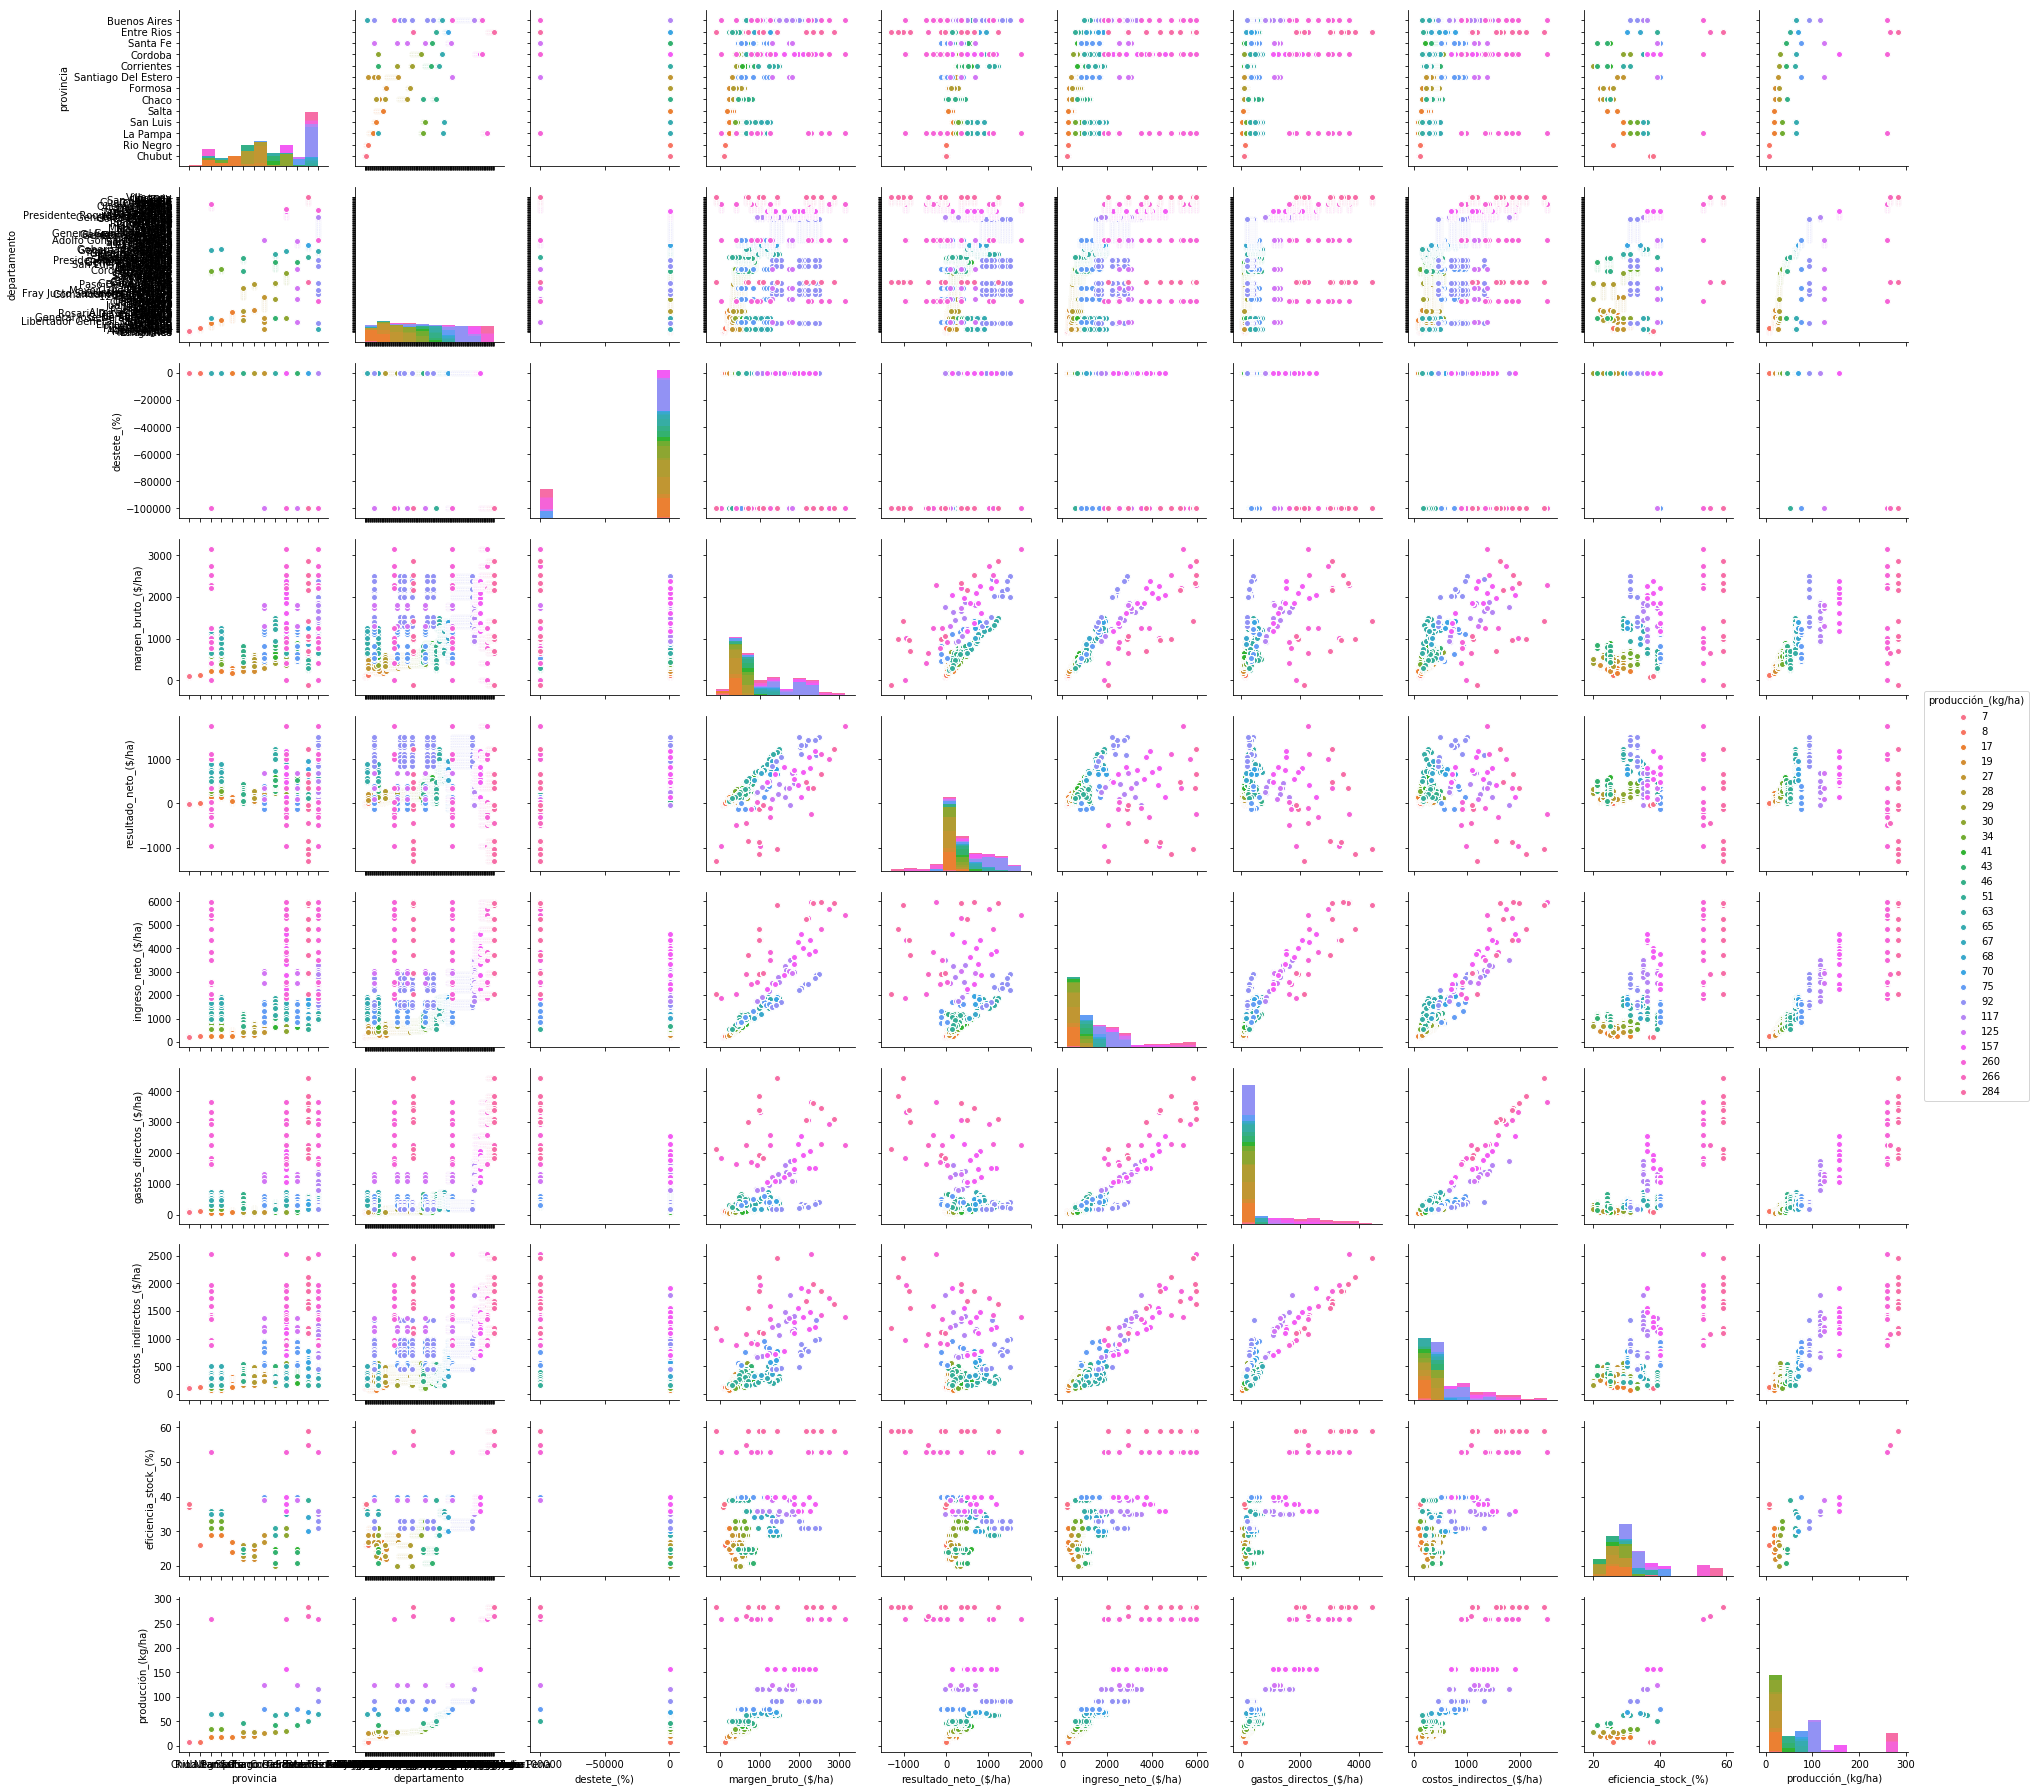

In [6]:
sns.pairplot(data, vars=["provincia", "departamento", "destete_(%)", "margen_bruto_($/ha)", "resultado_neto_($/ha)", "ingreso_neto_($/ha)", "gastos_directos_($/ha)", "costos_indirectos_($/ha)", "eficiencia_stock_(%)", "producción_(kg/ha)"], 
             hue = 'producción_(kg/ha)')
plt.show()

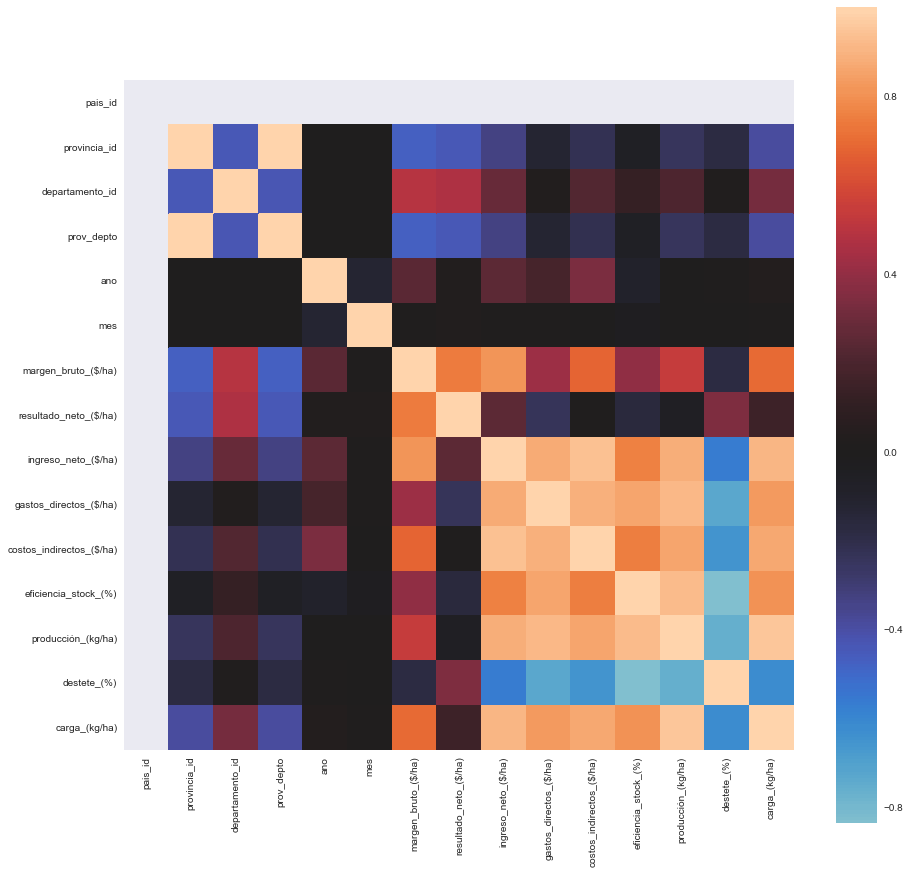

In [21]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax= 1, square=True, center=0);

In [22]:
prodpro = data.groupby(['provincia'])['producción_(kg/ha)'].sum()
prodpro.head(30).sort_values(ascending=False)

provincia
Buenos Aires           61380
Entre Rios             42012
La Pampa               29148
Cordoba                26244
Santa Fe               11006
Chaco                   9696
Corrientes              8608
Santiago Del Estero     7854
San Luis                3576
Salta                   2448
Formosa                 2364
Chubut                    84
Rio Negro                 64
Name: producción_(kg/ha), dtype: int64

In [23]:
prodact = data.groupby(['actividad'])['mes'].count()
prodact.head(30).sort_values(ascending=False)

actividad
cria              1800
invernada          432
ciclo completo     366
Name: mes, dtype: int64

In [24]:
dfcria=data.loc[data['actividad'] == 'cria']

In [25]:
dfcria.shape

(1800, 21)

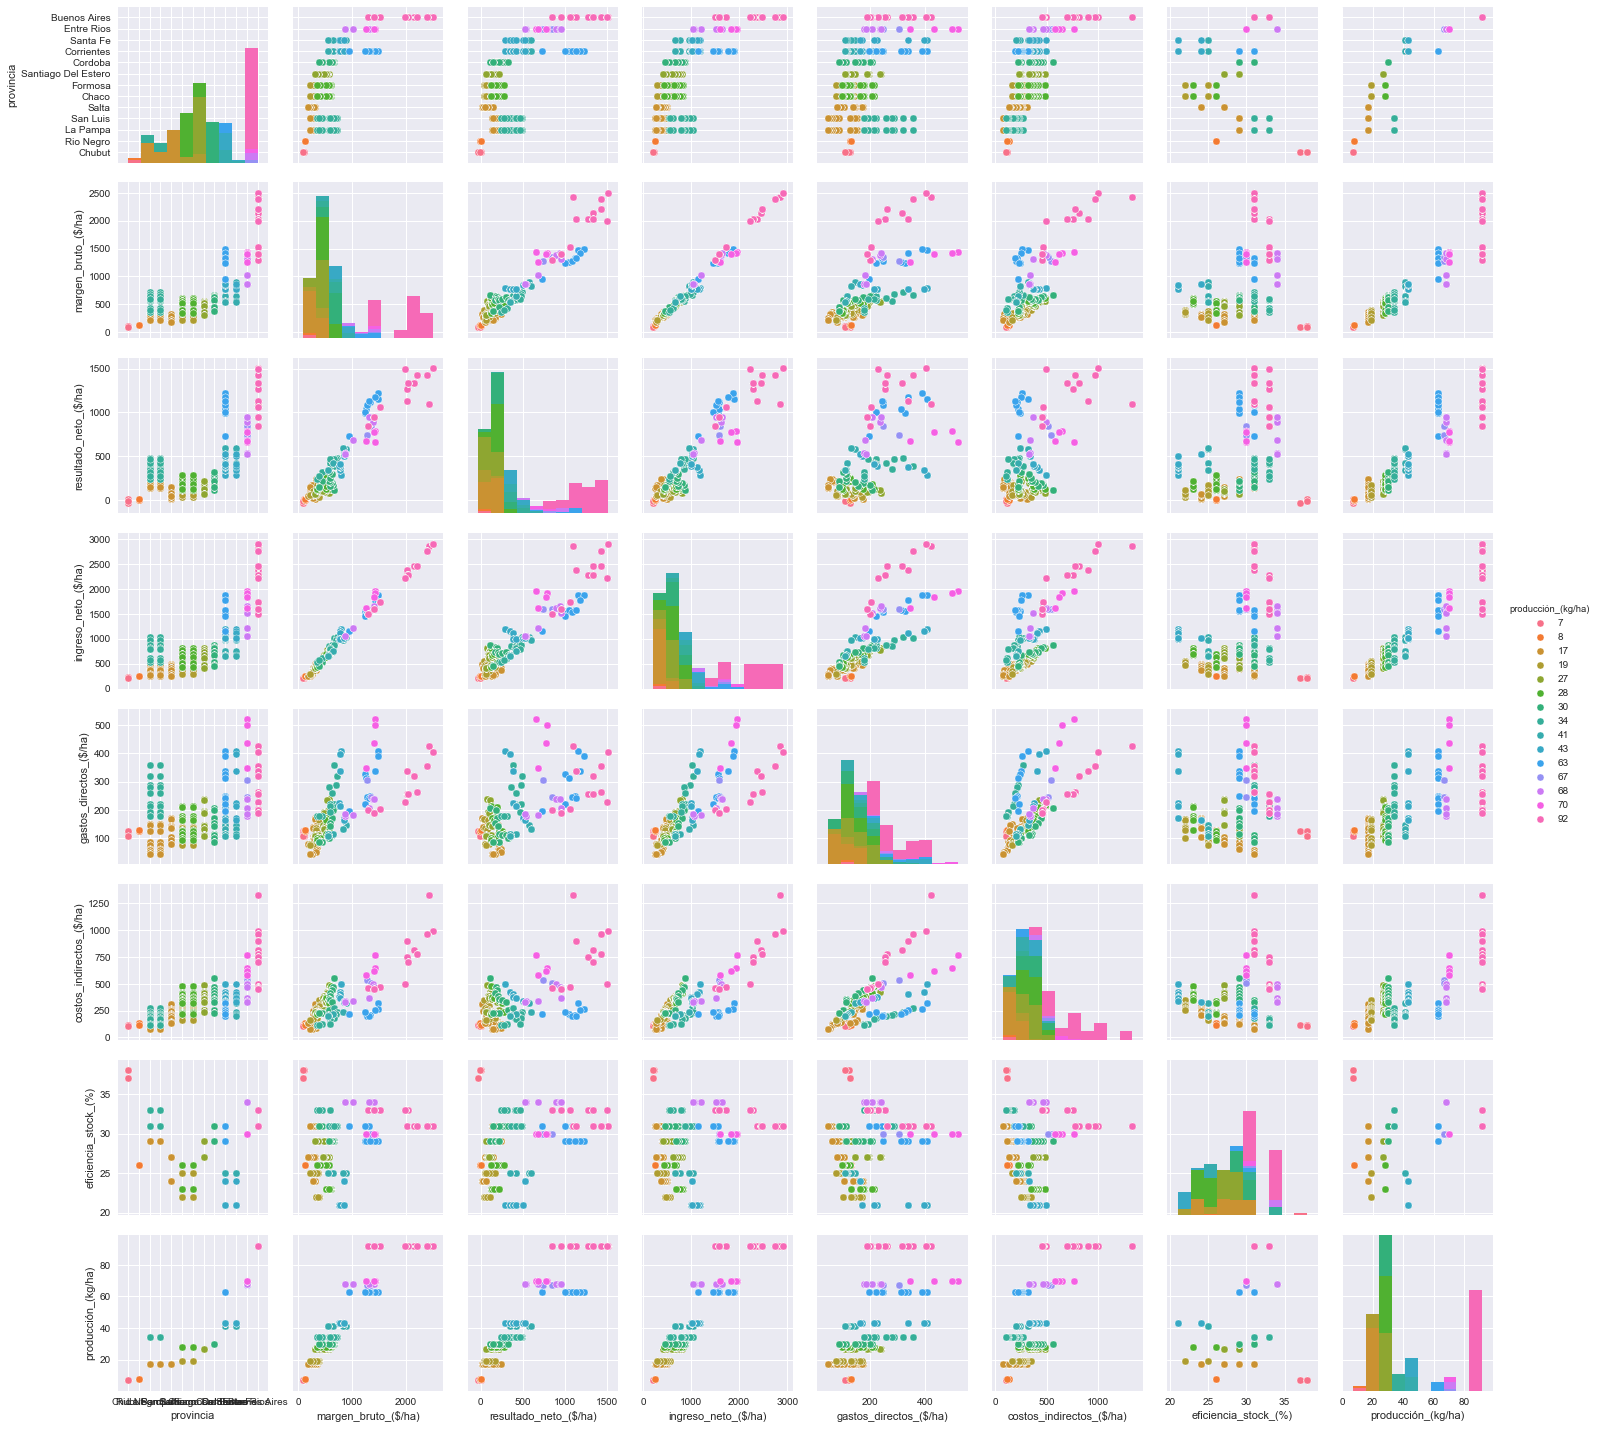

In [26]:
sns.pairplot(dfcria, vars=["provincia", "margen_bruto_($/ha)", "resultado_neto_($/ha)", "ingreso_neto_($/ha)", "gastos_directos_($/ha)", "costos_indirectos_($/ha)", "eficiencia_stock_(%)", "producción_(kg/ha)"], 
             hue = 'producción_(kg/ha)')
plt.show()

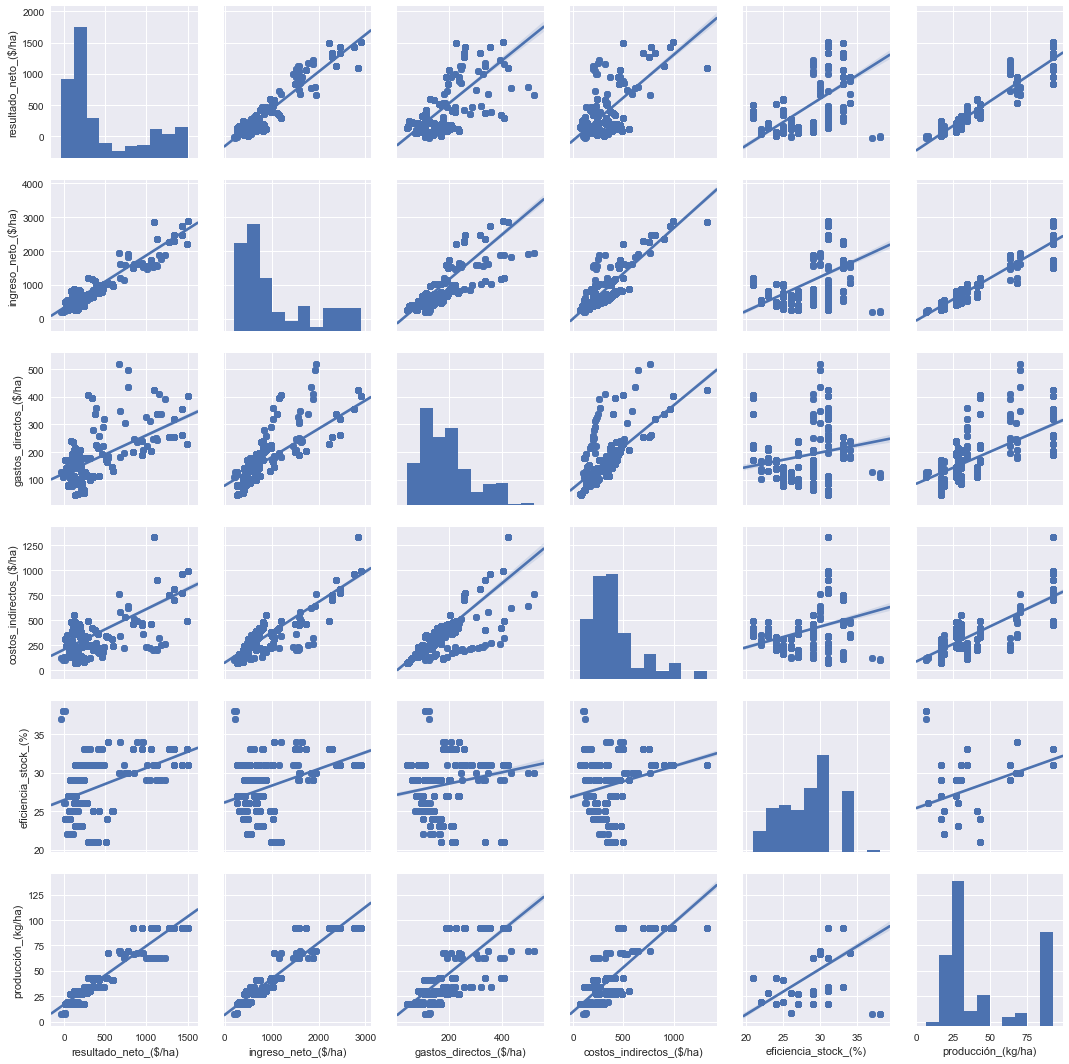

In [27]:
sns.set()
cols = ['resultado_neto_($/ha)', 'ingreso_neto_($/ha)', 'gastos_directos_($/ha)', 'costos_indirectos_($/ha)', 'eficiencia_stock_(%)', 'producción_(kg/ha)']
sns.pairplot(dfcria[cols], size = 2.5, kind="reg")
plt.show()

In [28]:
features = ['carga_(kg/ha)','margen_bruto_($/ha)', 'resultado_neto_($/ha)', 'ingreso_neto_($/ha)', 'gastos_directos_($/ha)', 'costos_indirectos_($/ha)', 'eficiencia_stock_(%)', 'producción_(kg/ha)']

x = dfcria.loc[:,features].values

y = dfcria.loc[:,'departamento'].values

In [29]:
x = StandardScaler().fit_transform(x)

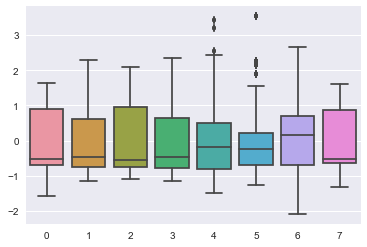

In [30]:
sns.boxplot(data = pd.DataFrame(x))
plt.show()

In [31]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
n_comps = 3
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(x))
eigenvalues = sklearn_pca.explained_variance_ratio_

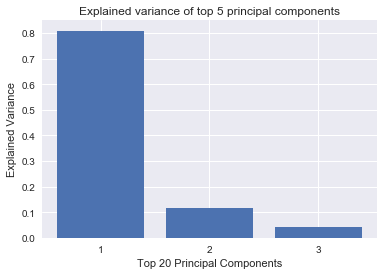

In [32]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 3 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

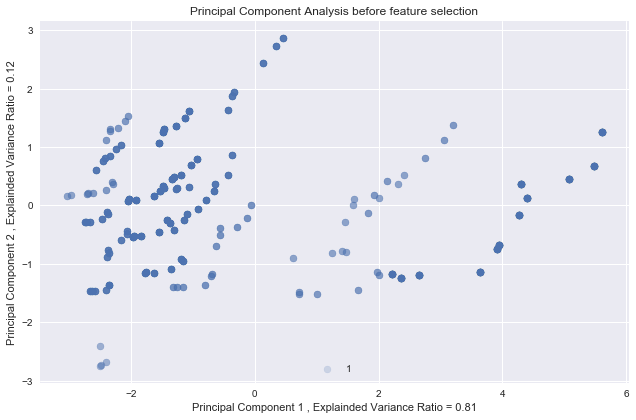

In [33]:
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [35]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [36]:
kmeans.cluster_centers_

array([[ 1.4086946 ,  1.42403304,  1.44907554,  1.4111465 ,  1.04241091,
         1.13439297,  0.92675785,  1.4704609 ],
       [-0.58788042, -0.5942815 , -0.60473231, -0.58890366, -0.43502188,
        -0.47340809, -0.38675721, -0.61365691]])

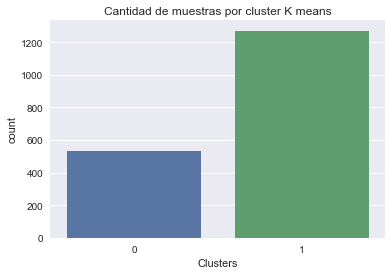

In [37]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [38]:
n_comps = 3
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(x))
eigenvalues = sklearn_pca.explained_variance_ratio_

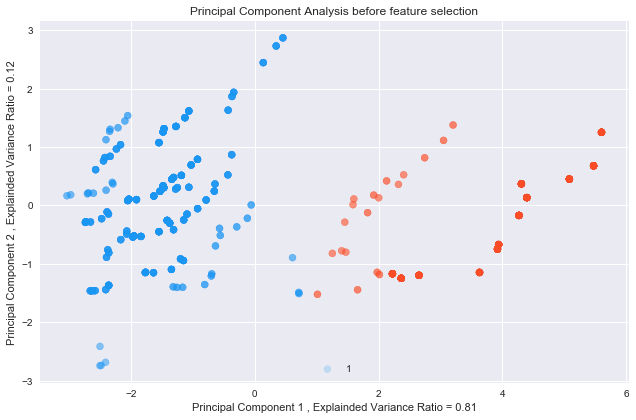

In [39]:
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
    elif y_pca[t,0]==3:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.7, 0.6, 1)),(4,))

plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [40]:
sklearn_pca.explained_variance_ratio_

array([0.80928011, 0.11564482, 0.04131322])

In [42]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [52]:
ClusterIndicesNumpy(1, kmeans.labels_)

array([   0,    1,    2, ..., 1796, 1797, 1798], dtype=int64)

In [53]:
dfcria = dfcria.drop(['modelo','pais','provincia_id','departamento_id','prov_depto','mes','referencia','pais_id'], axis=1)

In [54]:
dfcria.shape

(1800, 13)

In [55]:
cantprov = dfcria.groupby(['provincia'])['ano'].count()
cantprov.head(30).sort_values(ascending=False)

provincia
Buenos Aires           444
Santiago Del Estero    252
Chaco                  216
Cordoba                180
Corrientes             172
Salta                  144
La Pampa               120
Formosa                 96
San Luis                84
Entre Rios              60
Santa Fe                12
Chubut                  12
Rio Negro                8
Name: ano, dtype: int64

In [56]:
prov_dummie = pd.get_dummies(dfcria.provincia)
prov_dummie.head(10)

,Buenos Aires,Chaco,Chubut,Cordoba,Corrientes,Entre Rios,Formosa,La Pampa,Rio Negro,Salta,San Luis,Santa Fe,Santiago Del Estero
19,0,1,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,0,0,0,0,0
25,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,0,0,0,0
27,0,1,0,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
prov_dummie.shape

(1800, 13)

In [58]:
dfcria.departamento.replace(['Formosa'], ["FormosaDep"], inplace=True)

In [59]:
checkdep = dfcria.groupby(['departamento'])['ano'].count()
checkdep.head(50).sort_values(ascending=False)

departamento
Capital                          48
Belgrano                         24
Bermejo                          24
25 De Mayo                       24
Ayacucho                         24
General Guemes                   24
Avellaneda                       14
Castelli                         12
Canuelas                         12
Caleu Caleu                      12
Calamuchita                      12
Cafayate                         12
Cachi                            12
Brandsen                         12
General Guido                    12
Bella Vista                      12
Azul                             12
Atamisqui                        12
Almirante Brown                  12
Aguirre                          12
Adolfo Gonzales Chaves           12
2 De Abril                       12
12 De Octubre                    12
Cerrillos                        12
Chacabuco                        12
Chalileo                         12
Chascomus                        12
General Donovan

In [60]:
dep_dummie = pd.get_dummies(dfcria.departamento)
dep_dummie.head(10)

,1 De Mayo,12 De Octubre,2 De Abril,25 De Mayo,Adolfo Alsina,Adolfo Gonzales Chaves,Aguirre,Almirante Brown,Atamisqui,Avellaneda,...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dep_dummie.shape

(1800, 144)

In [62]:
dfcria = dfcria.join([prov_dummie, dep_dummie])

In [63]:
dfcria.head()

,provincia,departamento,ano,actividad,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
19,Chaco,1 De Mayo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
20,Chaco,12 De Octubre,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
21,Chaco,2 De Abril,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
22,Chaco,25 De Mayo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0
23,Chaco,Bermejo,2018,cria,608,127,823,215,482,23,...,0,0,0,0,0,0,0,0,0,0


In [64]:
print("La cantidad de features nuevas agregadas a dataframe son = " + str(np.shape(prov_dummie)[1]+np.shape(dep_dummie)[1]))

La cantidad de features nuevas agregadas a dataframe son = 157


In [65]:
y = np.array(dfcria[["resultado_neto_($/ha)"]])

In [117]:
x = dfcria.drop(['actividad', 'departamento','provincia','ano',"resultado_neto_($/ha)","ingreso_neto_($/ha)"], axis=1)

In [118]:
np.shape(x)

(1800, 164)

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.40, random_state=42)

In [120]:
xtrain.head()

,margen_bruto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Buenos Aires,Chaco,Chubut,...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
2210,341,100,223,26,28,60,108,0,1,0,...,0,0,0,0,0,0,0,0,0,0
649,534,198,412,27,27,60,101,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,893,146,316,25,41,65,162,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,391,164,302,22,19,60,85,0,1,0,...,0,0,0,0,0,0,0,0,0,0
546,2395,355,967,31,92,72,293,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
xtrain.shape

(1080, 164)

In [122]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [123]:
xtrain_scal = scaler.transform(xtrain)  

In [124]:
xtest_scal = scaler.transform(xtest)  

In [125]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
n_comps = 20
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xtrain_scal))
eigenvalues = sklearn_pca.explained_variance_ratio_

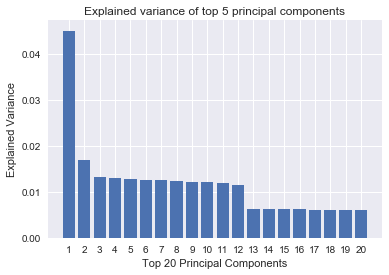

In [126]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [127]:
thresh = 0.5
sel = VarianceThreshold(threshold=thresh)
sel.fit_transform(xtrain)

array([[ 341,  100,  223, ...,   28,   60,  108],
       [ 534,  198,  412, ...,   27,   60,  101],
       [ 893,  146,  316, ...,   41,   65,  162],
       ...,
       [ 357,   63,  120, ...,   17,   65,   59],
       [ 250,   47,   81, ...,   17,   65,   55],
       [2030,  256,  700, ...,   92,   72,  276]], dtype=int64)

In [128]:
print("La cantidad de Features seleccionadas son " + str(np.shape(sel.fit_transform(xtrain))[1]))

La cantidad de Features seleccionadas son 7


In [129]:
sel.get_support(True)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [130]:
xtrain.head()

,margen_bruto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Buenos Aires,Chaco,Chubut,...,Sauce,Silipica,Sobremonte,Tapalque,Tehuelches,Toay,Tordillo,Totoral,Tulumba,Utracan
2210,341,100,223,26,28,60,108,0,1,0,...,0,0,0,0,0,0,0,0,0,0
649,534,198,412,27,27,60,101,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,893,146,316,25,41,65,162,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,391,164,302,22,19,60,85,0,1,0,...,0,0,0,0,0,0,0,0,0,0
546,2395,355,967,31,92,72,293,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
xtrain_scal_red_thresh = sel.transform(xtrain_scal)
np.shape(xtrain_scal_red_thresh)

(1080, 7)

In [132]:
xtest_scal_red_thresh = sel.transform(xtest_scal)
np.shape(xtest_scal_red_thresh)

(720, 7)

In [133]:
lr = LinearRegression()

In [134]:
lr.fit(xtrain_scal_red_thresh, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
ypred = lr.predict(xtest_scal_red_thresh)

In [136]:
np.shape(ypred)

(720, 1)

In [137]:
np.sqrt(mean_squared_error(ytest, ypred))

0.4289612879036826

In [138]:
mean_squared_error(ytest, ypred)

0.1840077865199861

In [139]:
mean_absolute_error(ytest, ypred)

0.29886253889131614

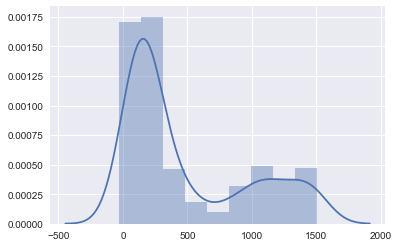

In [140]:
sns.distplot(ytest)
plt.show()

In [141]:
neigh = KNeighborsRegressor(weights = "distance")

In [142]:
 # creo un array de 5 posiciones con los valores del hiperparametro "k" que quiero probar por gridsearch
parameters_k = np.arange(20,30,2)
parameters_k

array([20, 22, 24, 26, 28])

In [143]:
parameters_knn = [{'n_neighbors': parameters_k}]

In [144]:
n_folds = 5

In [145]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds)

In [146]:
regresor_neigh.fit(xtrain_scal, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([20, 22, 24, 26, 28])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
regresor_neigh.best_params_

{'n_neighbors': 20}

In [148]:
regresor_neigh.best_score_

0.9329853138348083

In [149]:
ypred2 = regresor_neigh.predict(xtest_scal)
ypred2

array([[1109.46257706],
       [ 273.89761964],
       [ 179.41856615],
       [ 169.46439347],
       [1211.54599345],
       [ 920.62195165],
       [ 651.7997793 ],
       [ 172.08881332],
       [ 182.17363649],
       [ 841.83619258],
       [ 232.57764837],
       [ 133.53356292],
       [ 177.95094864],
       [ 134.77564261],
       [ 134.87846967],
       [1163.04876121],
       [ 688.13829037],
       [ 931.40003113],
       [1277.66632565],
       [1030.57727025],
       [ 202.12732585],
       [ 207.38846145],
       [1305.30809268],
       [ 452.77001808],
       [ 207.49899602],
       [ 188.99426047],
       [ 187.8531803 ],
       [1310.08954577],
       [1081.37973551],
       [1195.22955064],
       [1028.84357307],
       [1256.06374777],
       [ 179.31465776],
       [ 123.52187475],
       [ 113.88345732],
       [ 391.22972965],
       [ 125.3319714 ],
       [ 190.89853899],
       [1034.6001827 ],
       [ 411.74938732],
       [ 109.37136996],
       [  98.163

In [150]:
np.sqrt(mean_squared_error(ytest, ypred2))

121.51545407374853

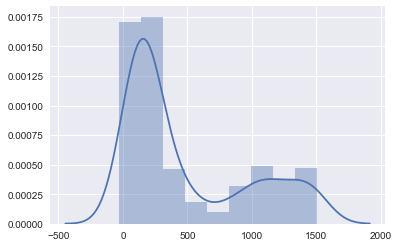

In [151]:
sns.distplot(ytest)
plt.show()